In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("./data/features3_train.csv")
X = data[data.columns[:-1]]
y = data['VV']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20)

In [23]:
from Python.sklearn.data_split import *
X_train_bal, y_train_bal = balance_sample(X_train, y_train)
X_train_bal.shape

(40868, 27)

In [26]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_bal, y_train_bal)

y_train_pred = model.predict(X_train_bal)
y_valid_pred = model.predict(X_valid)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [27]:
from sklearn.metrics import f1_score
print(f1_score(y_train_bal, y_train_pred))
print(f1_score(y_valid, y_valid_pred))

1.0
0.07352941176470588


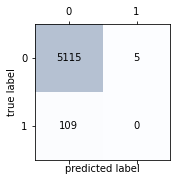

In [19]:
from sklearn.metrics import confusion_matrix

confmt = confusion_matrix(y_true=y_valid, y_pred=y_valid_pred)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmt, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmt.shape[0]):
    for j in range(confmt.shape[1]):
        ax.text(x=j, y=i, s=confmt[i, j], va='center', ha='center')
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.show()

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'criterion': ['gini', 'entropy'],
    'max_depth': [6, 8, 10, None],
    'n_estimators': [50, 100, 150],
    'min_samples_leaf': [1, 3, 5],
    "max_features": [1,2, 3, 5]
}]

gs = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1_weighted')

gs.fit(X_train_bal, y_train_bal)
print(gs.best_score_)

0.9974062545544389


In [34]:
gs.best_params_
y_valid_pred = gs.predict(X_valid)
print(f1_score(y_valid, y_valid_pred))

0.05925925925925926


/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
